# Part2: Data Preprocessing and Visualization

## View the NAN's

For practice use tha data: https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete2.csv

In [ ]:
# read the dataframe and visualize where the values are missing in many different ways

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataframe with missing values
d = pd.read_csv('https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete.csv')

# 1. Percentage of missing values per column
missing_percentage = d.isnull().sum() * 100 / len(d)
print("Percentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
A     8.0
B    13.0
C    13.0
D     4.0
E     7.0
F     6.0
G     4.0
H    11.0
I    11.0
J     5.0
K     7.0
L    90.0
dtype: float64


In [ ]:
# 2. Number of missing values per column
missing_counts = d.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_counts)

#What is the difference between #1 and #2?


Number of Missing Values per Column:
A     8
B    13
C    13
D     4
E     7
F     6
G     4
H    11
I    11
J     5
K     7
L    90
dtype: int64


In [ ]:
# 3. Total number of missing values in the entire DataFrame
total_missing = d.isnull().sum().sum()
print("\nTotal Number of Missing Values:", total_missing)




Total Number of Missing Values: 179


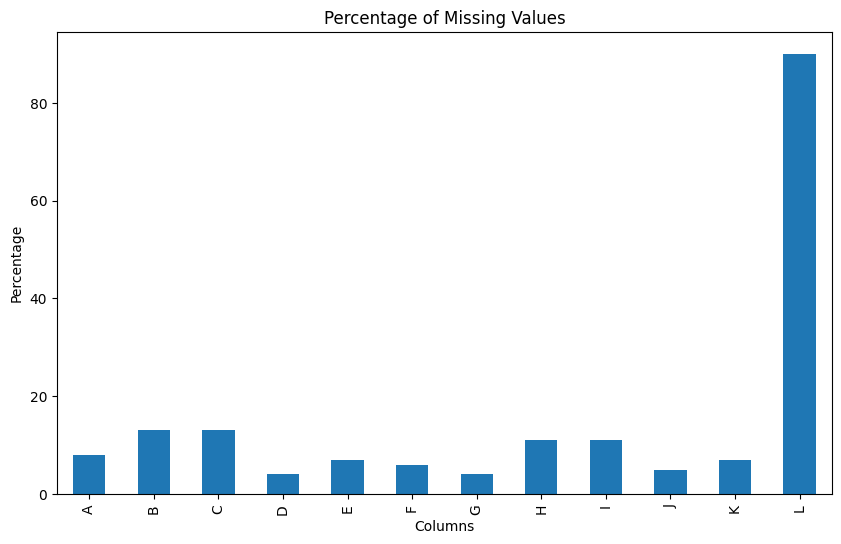

In [ ]:
# 4. Visualize missingness using a bar plot
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.show()

# Can you think about any other plot?


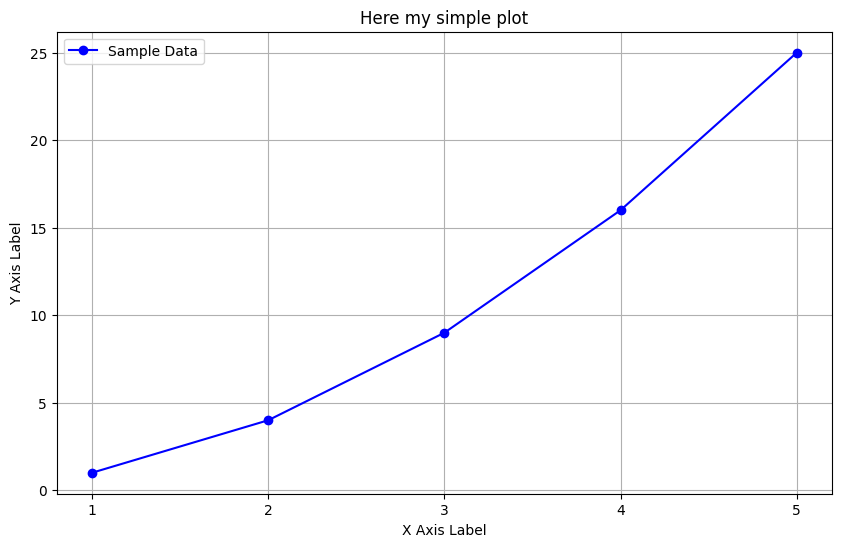

In [ ]:
#How to plot
import matplotlib.pyplot as plt

# Step 1: Prepare your data for example `x_data` and `y_data` in this case. They could be lists, numpy arrays, or pandas Series/DataFrames.

x_data = [1, 2, 3, 4, 5]
y_data = [1, 4, 9, 16, 25]

# Step 2: Create a figure, optional and You can adjust the size of the plot (width, height in inches)
plt.figure(figsize=(10, 6))

# Step 3: Plot the data
plt.plot(x_data, y_data, label="Sample Data", color='blue', marker='o')  # Line plot with customization

# Optional: In case you have another set
# plt.plot(x_data2, y_data2, label="Another Data", color='red')

# Step 4: Customize your plot. Title, axis labels, and legend
plt.title('Here my simple plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.legend()

# Optional: Customize tick marks and grid
plt.xticks([1, 2, 3, 4, 5])  # Set specific x-axis ticks
plt.yticks([0, 5, 10, 15, 20, 25])  # Set specific y-axis ticks
plt.grid(True)  # Show grid

# Step 5: Display the plot
plt.show()  # This will display the plot

# Step 6: Save the plot (optional)
# plt.savefig('my_plot.png')  # Save the plot to a file (e.g., PNG, PDF, etc.)


## All about Outliers

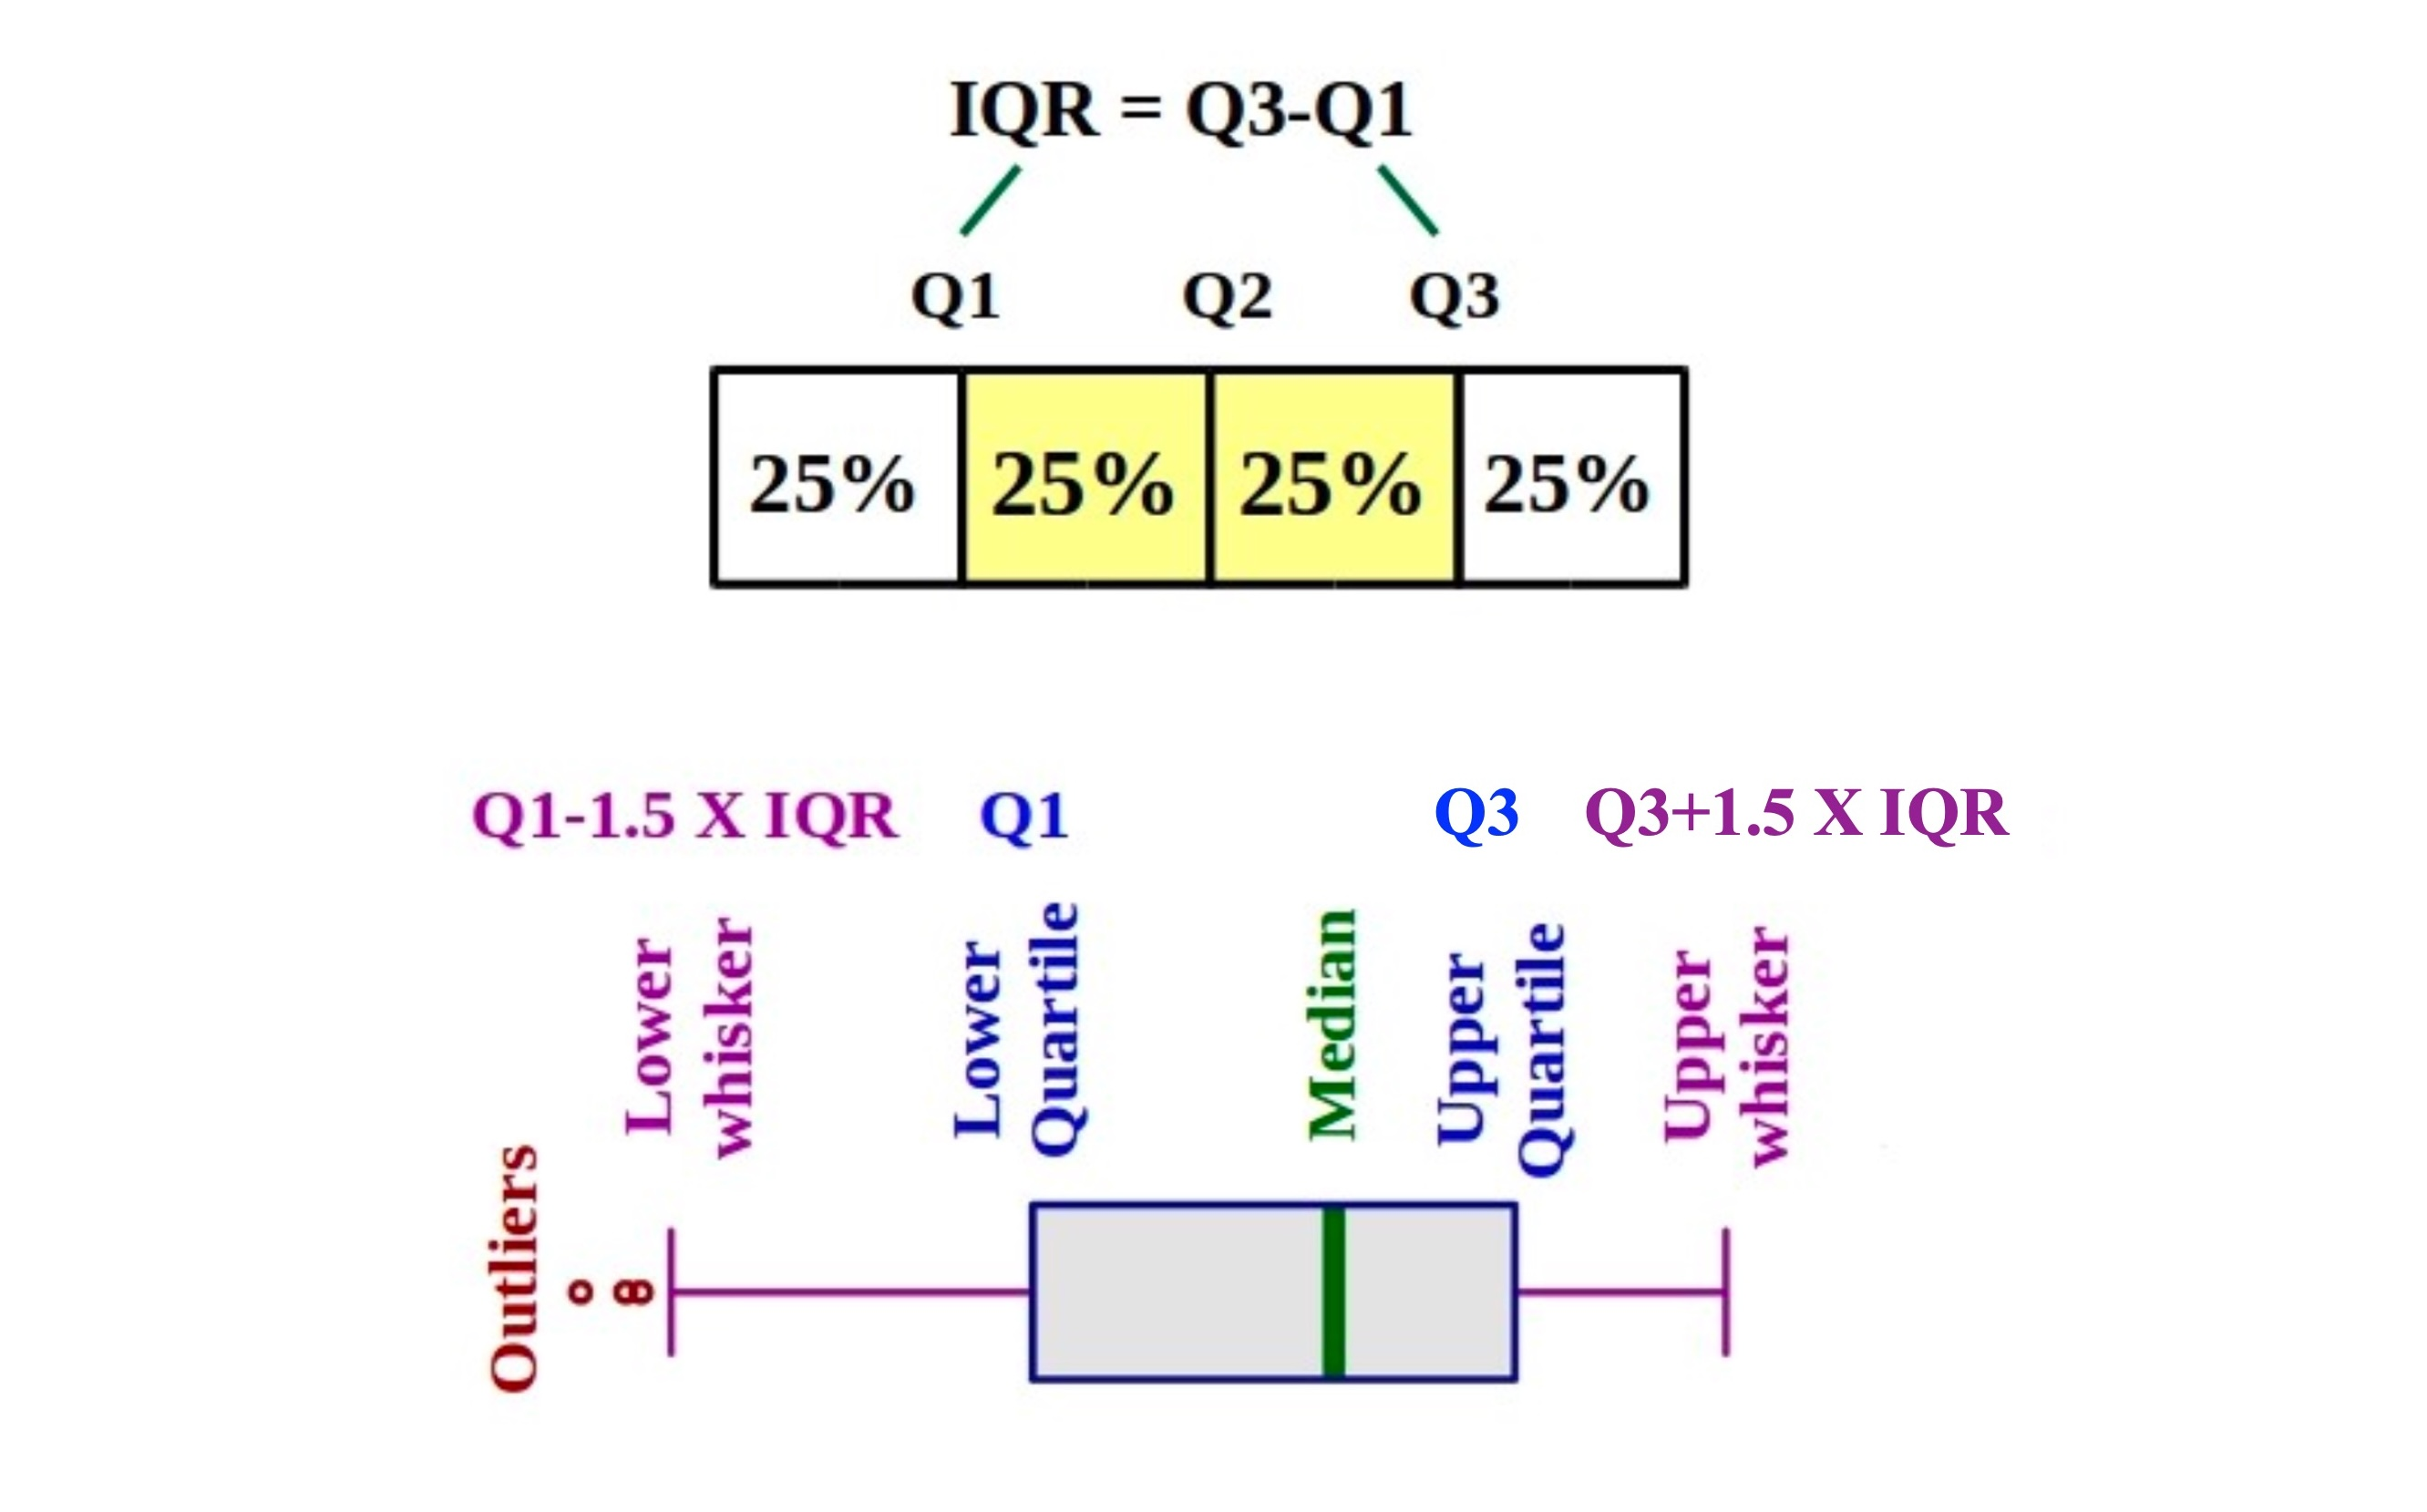

Outliers in column 'A':
            A          B          C         D          E          F  \
0   43.664209        NaN  42.060509  0.456604   0.914679   6.313639   
20  31.764536        NaN        NaN  3.889664   6.353474   5.387763   
52  23.853462        NaN   5.121706  4.644986   3.451354   5.011971   
83  42.610965   4.398963   0.654493  6.154557   5.057709   3.025889   
93  20.552832   3.202197   2.225125  5.457249   1.586157   3.176439   
95  32.967224   1.811127   3.181235  6.522226  35.798714   4.318259   
98  45.203645  33.937958        NaN  5.281010   7.797719  41.735506   

            G          H         I          J          K          L  
0    1.772457   5.905225  8.516140   2.781733   2.673348        NaN  
20   1.926758  10.327911       NaN  11.303237   9.794142        NaN  
52  24.852926   6.942018  2.597877   2.362289  13.153041        NaN  
83   6.719568   3.868086  1.338892   1.069277  12.319744        NaN  
93   2.499856   6.764851  4.826484   7.713976   7.226370 

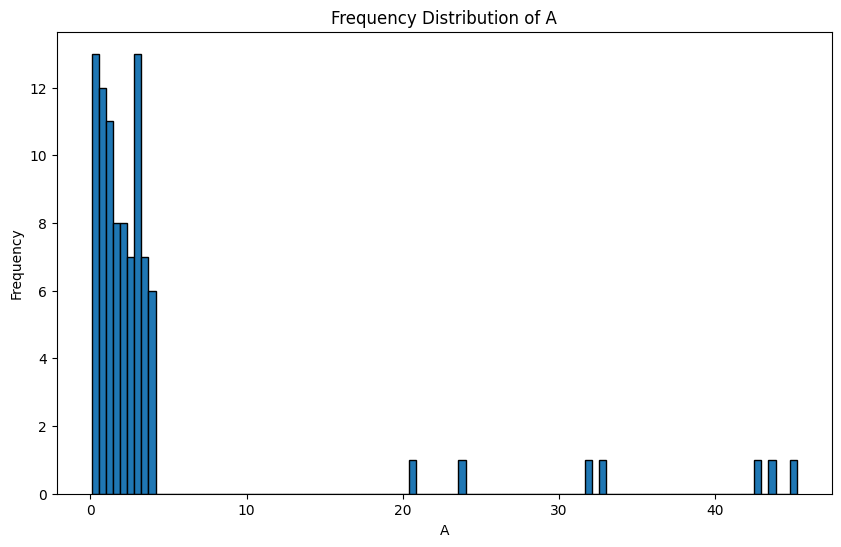

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'A' is the column you want to analyze
column_name = 'A'

# Calculate quartiles (Q1, Q3) and IQR
Q1 = d[column_name].quantile(0.25)
Q3 = d[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = d[(d[column_name] < lower_bound) | (d[column_name] > upper_bound)]

# Print outliers
print("Outliers in column 'A':")
print(outliers)

# Plot frequencies (histogram)
plt.figure(figsize=(10, 6))
plt.hist(d[column_name].dropna(), bins=100, edgecolor='black')  # Use dropna() to handle NaN values
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution of {column_name}')
plt.show()


## Handle the NAN's

In [ ]:
# different methods of filling the nans with proper explaination


## 1. Fill with the mean
## d['A_mean']: This creates a new column in your DataFrame called A_mean.
## d['A'].fillna(): This part of the code uses the fillna() function to fill missing values (NaNs) in the original A column.
## d['A'].mean(): This calculates the average value of the A column (excluding missing values) and uses it to fill in the NaNs.
## In simpler terms: This method replaces all missing values in column A with the average value of the non-missing values in that column.
d['A_mean'] = d['A'].fillna(d['A'].mean())

## 2. Fill with the median
## Similar to the mean method, this one creates a new column called A_median
## and fills missing values in the original A column with the median value of A.
#d['A_median'] = d['A'].fillna(d['A'].median())

## 3. Fill with the mode
## This method creates a new column called A_mode and fills missing values in the original A column with the mode value of A.
##The [0] is used because mode() might return multiple values if there are multiple most frequent values, and we are selecting the first one.
## In simpler terms: This method replaces all missing values in column A with the most frequent value in that column.
#d['A_mode'] = d['A'].fillna(d['A'].mode()[0]) # Mode can return multiple values, take the first

## 4. Forward Fill (propagate last valid observation forward)
## This method creates a new column called A_ffill and fills missing values in the original A column using forward fill.
##method='ffill' propagates the last observed non-missing value forward to fill the NaNs.
## In simpler terms: If a value is missing, it is filled with the previous non-missing value in the column.
#d['A_ffill'] = d['A'].fillna(method='ffill')

## 5. Backward Fill (propagate next valid observation backward)
## This method creates a new column called A_bfill and fills missing values in the original A column using backward fill.
##method='bfill' propagates the next observed non-missing value backward to fill the NaNs.
## In simpler terms: If a value is missing, it is filled with the next non-missing value in the column.
#d['A_bfill'] = d['A'].fillna(method='bfill')

## 6. Interpolation (linear interpolation)
## This method creates a new column called A_interpolate and fills missing values in the original A column using linear interpolation.
##method='linear' estimates the missing values by creating a straight line between the surrounding non-missing values.
## In simpler terms: Missing values are estimated using a linear trend between the known data points.
#d['A_interpolate'] = d['A'].interpolate(method='linear')

## 7. Fill with a constant value (e.g., 0)
#d['A_constant'] = d['A'].fillna(0)


## Example using the 'A' column (you can repeat for other columns)
#print(d[['A', 'A_mean', 'A_median', 'A_mode', 'A_ffill', 'A_bfill', 'A_interpolate', 'A_constant']].head(20))


## Scaling the data

In [ ]:
# fill all the nan colums of the dataset with mean of the column

import pandas as pd
# Fill NaN values with the mean of each column
for col in d.columns:
    if pd.api.types.is_numeric_dtype(d[col]):  # Check if the column is numeric
        d[col] = d[col].fillna(d[col].mean())
print(d)

            A          B          C         D          E          F  \
0   43.664209   5.875711  42.060509  0.456604   0.914679   6.313639   
1    3.807786   3.218411   0.596426  3.766347   7.230168   4.871258   
2    2.954776   1.640344   1.053609  3.830382   4.091494   2.854796   
3    4.393266   2.591996   5.401470  4.498266   6.629014   7.627215   
4    0.708473   4.547076   4.640637  5.110030   2.628392   6.194107   
..        ...        ...        ...       ...        ...        ...   
95  32.967224   1.811127   3.181235  6.522226  35.798714   4.318259   
96   2.138658   3.657183   4.642962  6.023048   4.710883   6.041264   
97   1.767410   4.495840   1.373344  3.060059   0.714104   1.633647   
98  45.203645  33.937958   4.640637  5.281010   7.797719  41.735506   
99   4.393266   3.921390   0.603550  5.306346   7.891065   0.463731   

            G          H          I          J          K          L  
0    1.772457   5.905225   8.516140   2.781733   2.673348  36.714606  
1    

In [ ]:
# scale the columns by different scaling method

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Assuming 'd' is your DataFrame with filled NaN values

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
d_min_max = pd.DataFrame(min_max_scaler.fit_transform(d), columns=d.columns)

# 2. Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
d_standard = pd.DataFrame(standard_scaler.fit_transform(d), columns=d.columns)

# 3. Robust Scaling (less sensitive to outliers)
robust_scaler = RobustScaler()
d_robust = pd.DataFrame(robust_scaler.fit_transform(d), columns=d.columns)

# Print or use the scaled DataFrames
print("Min-Max Scaled Data:")
print(d_min_max)

print("\nStandard Scaled Data:")
print(d_standard)

print("\nRobust Scaled Data:")
d_robust


Min-Max Scaled Data:
           A         B         C         D         E         F         G  \
0   0.965853  0.116236  1.000000  0.005040  0.017268  0.146586  0.030721   
1   0.081767  0.062441  0.011127  0.077286  0.166851  0.111835  0.053350   
2   0.062846  0.030494  0.022030  0.078684  0.092511  0.063252  0.032387   
3   0.094754  0.049759  0.125722  0.093263  0.152612  0.178233  0.014163   
4   0.013019  0.089339  0.107577  0.106617  0.057857  0.143706  0.020753   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.728575  0.033951  0.072772  0.137443  0.843499  0.098511  0.121869   
96  0.044743  0.071323  0.107632  0.126546  0.107181  0.140023  0.764985   
97  0.036508  0.088301  0.029656  0.061869  0.012517  0.033831  0.115806   
98  1.000000  0.684338  0.107577  0.110349  0.180293  1.000000  0.027713   
99  0.094754  0.076672  0.011297  0.110902  0.182504  0.005645  0.095149   

           H         I         J         K         L  
0   0.13535

,A,B,C,D,E,F,G,H,I,J,K,L
0,17.101690,0.869217,13.635235,-1.095879,-0.901377,0.187249,-0.543242,-0.221519,0.211966,-0.682127,-0.804428,0.000000
1,0.670441,0.004693,-1.148802,-0.172323,0.482447,-0.122381,-0.339740,-1.267281,-0.895284,-1.047091,1.597795,0.000000
2,0.318778,-0.508715,-0.985792,-0.154454,-0.205286,-0.555247,-0.528255,-0.647826,-0.049427,-0.735357,0.415782,0.000000
3,0.911812,-0.199105,0.564439,0.031913,0.350725,0.469229,-0.692139,-1.087629,0.011308,5.972929,0.166137,0.000000
4,-0.607285,0.436960,0.293164,0.202621,-0.525875,0.161590,-0.632877,-1.242154,-0.353153,-0.252393,0.298013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.691740,-0.453152,-0.227187,0.596682,6.742268,-0.241091,0.276450,0.517037,0.200473,-0.916182,0.233384,12.627248
96,-0.017675,0.147442,0.293993,0.457391,-0.069568,0.128779,6.059913,0.228973,-0.614611,0.745556,-0.741710,0.000000
97,-0.170727,0.420291,-0.871791,-0.369407,-0.945326,-0.817386,0.221923,-0.150730,0.589427,-0.825146,-0.802112,0.000000
98,17.736339,9.998972,0.293164,0.250331,0.606806,7.791121,-0.570285,0.135347,-1.173817,0.811813,0.250155,0.000000


## Different kinds of Plotting

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming 'd_STANDARD' is your scaled DataFrame
plt.figure(figsize=(8, 6))

# Plot column 'A' vs 'B'
plt.scatter(d_STANDARD['A'], d_STANDARD['B'], marker='o', linestyle='-', label='A vs B')

# Customize the plot
plt.xlabel('A', fontsize=12)
plt.ylabel('B', fontsize=12)
plt.title('2D Plot of Scaled Data (A vs B)', fontsize=14)
plt.grid(True)

plt.legend()

plt.show()


NameError: name 'd_STANDARD' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'd_robust' is your scaled DataFrame
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(data=d_robust, orient="h")  # Use orient="h" for horizontal boxes

# Customize the plot
plt.xlabel('Scaled Value', fontsize=12)
plt.title('Box Plot of Scaled Data', fontsize=14)
plt.grid(True)

plt.show()


Index(['x', 'y', 'z'], dtype='object')
<bound method NDFrame.head of          x     y         z
0    -5.00 -5.00  0.708861
1    -4.75 -5.00  0.575628
2    -4.50 -5.00  0.429218
3    -4.25 -5.00  0.275411
4    -4.00 -5.00  0.119652
...    ...   ...       ...
1595  3.75  4.75 -0.229268
1596  4.00  4.75 -0.073248
1597  4.25  4.75  0.090465
1598  4.50  4.75  0.257023
1599  4.75  4.75  0.420802

[1600 rows x 3 columns]>


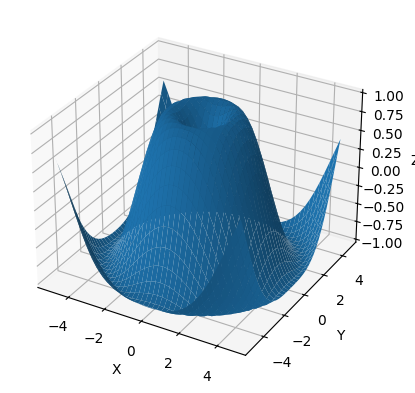

In [ ]:
#3D_plot
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


df_read = pd.read_csv('https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/surface.csv')
print(df_read.columns)
print(df_read.head)

# Assuming 'x', 'y' are columns in your DataFrame and 'z' is the data to plot
# Replace 'x_column', 'y_column' with actual column names if different
x_column = df_read.columns[0]
y_column = df_read.columns[1]
z_column = df_read.columns[2]

# Create meshgrid for x and y (needed for surface plots)
x = df_read[x_column].values.reshape(-1, 1)  # Assuming your x values are not a meshgrid
y = df_read[y_column].values.reshape(-1, 1)  # Assuming your y values are not a meshgrid
num_points = int(len(df_read)**0.5)  # Calculate number of points for meshgrid
x, y = np.meshgrid(np.linspace(x.min(), x.max(), num_points),
                  np.linspace(y.min(), y.max(), num_points))

# Get z values and reshape (use your actual column name)
z = df_read[z_column].values.reshape(num_points, num_points)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**Violin Plot**

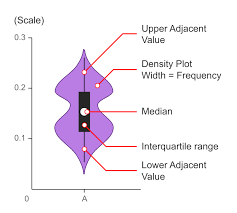

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'd_robust' is your scaled DataFrame
plt.figure(figsize=(8, 6))

# Create the violin plot
sns.violinplot(data=d_robust)

# Customize the plot
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.title('Violin Plot of Scaled Data', fontsize=14)
plt.grid(True)

plt.show()


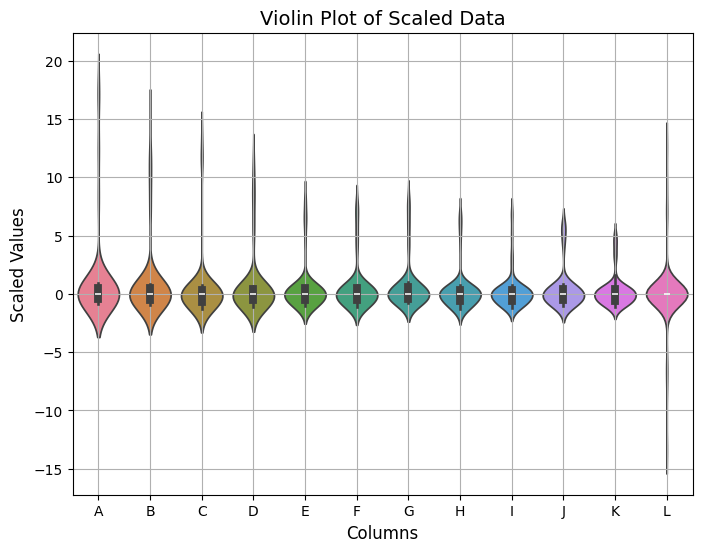

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'd_robust' is your scaled DataFrame
plt.figure(figsize=(8, 6))

# Create the violin plot
sns.violinplot(data=d_robust)

# Customize the plot
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.title('Violin Plot of Scaled Data', fontsize=14)
plt.grid(True)

plt.show()


**Pearson correlation and heatmap plotting**

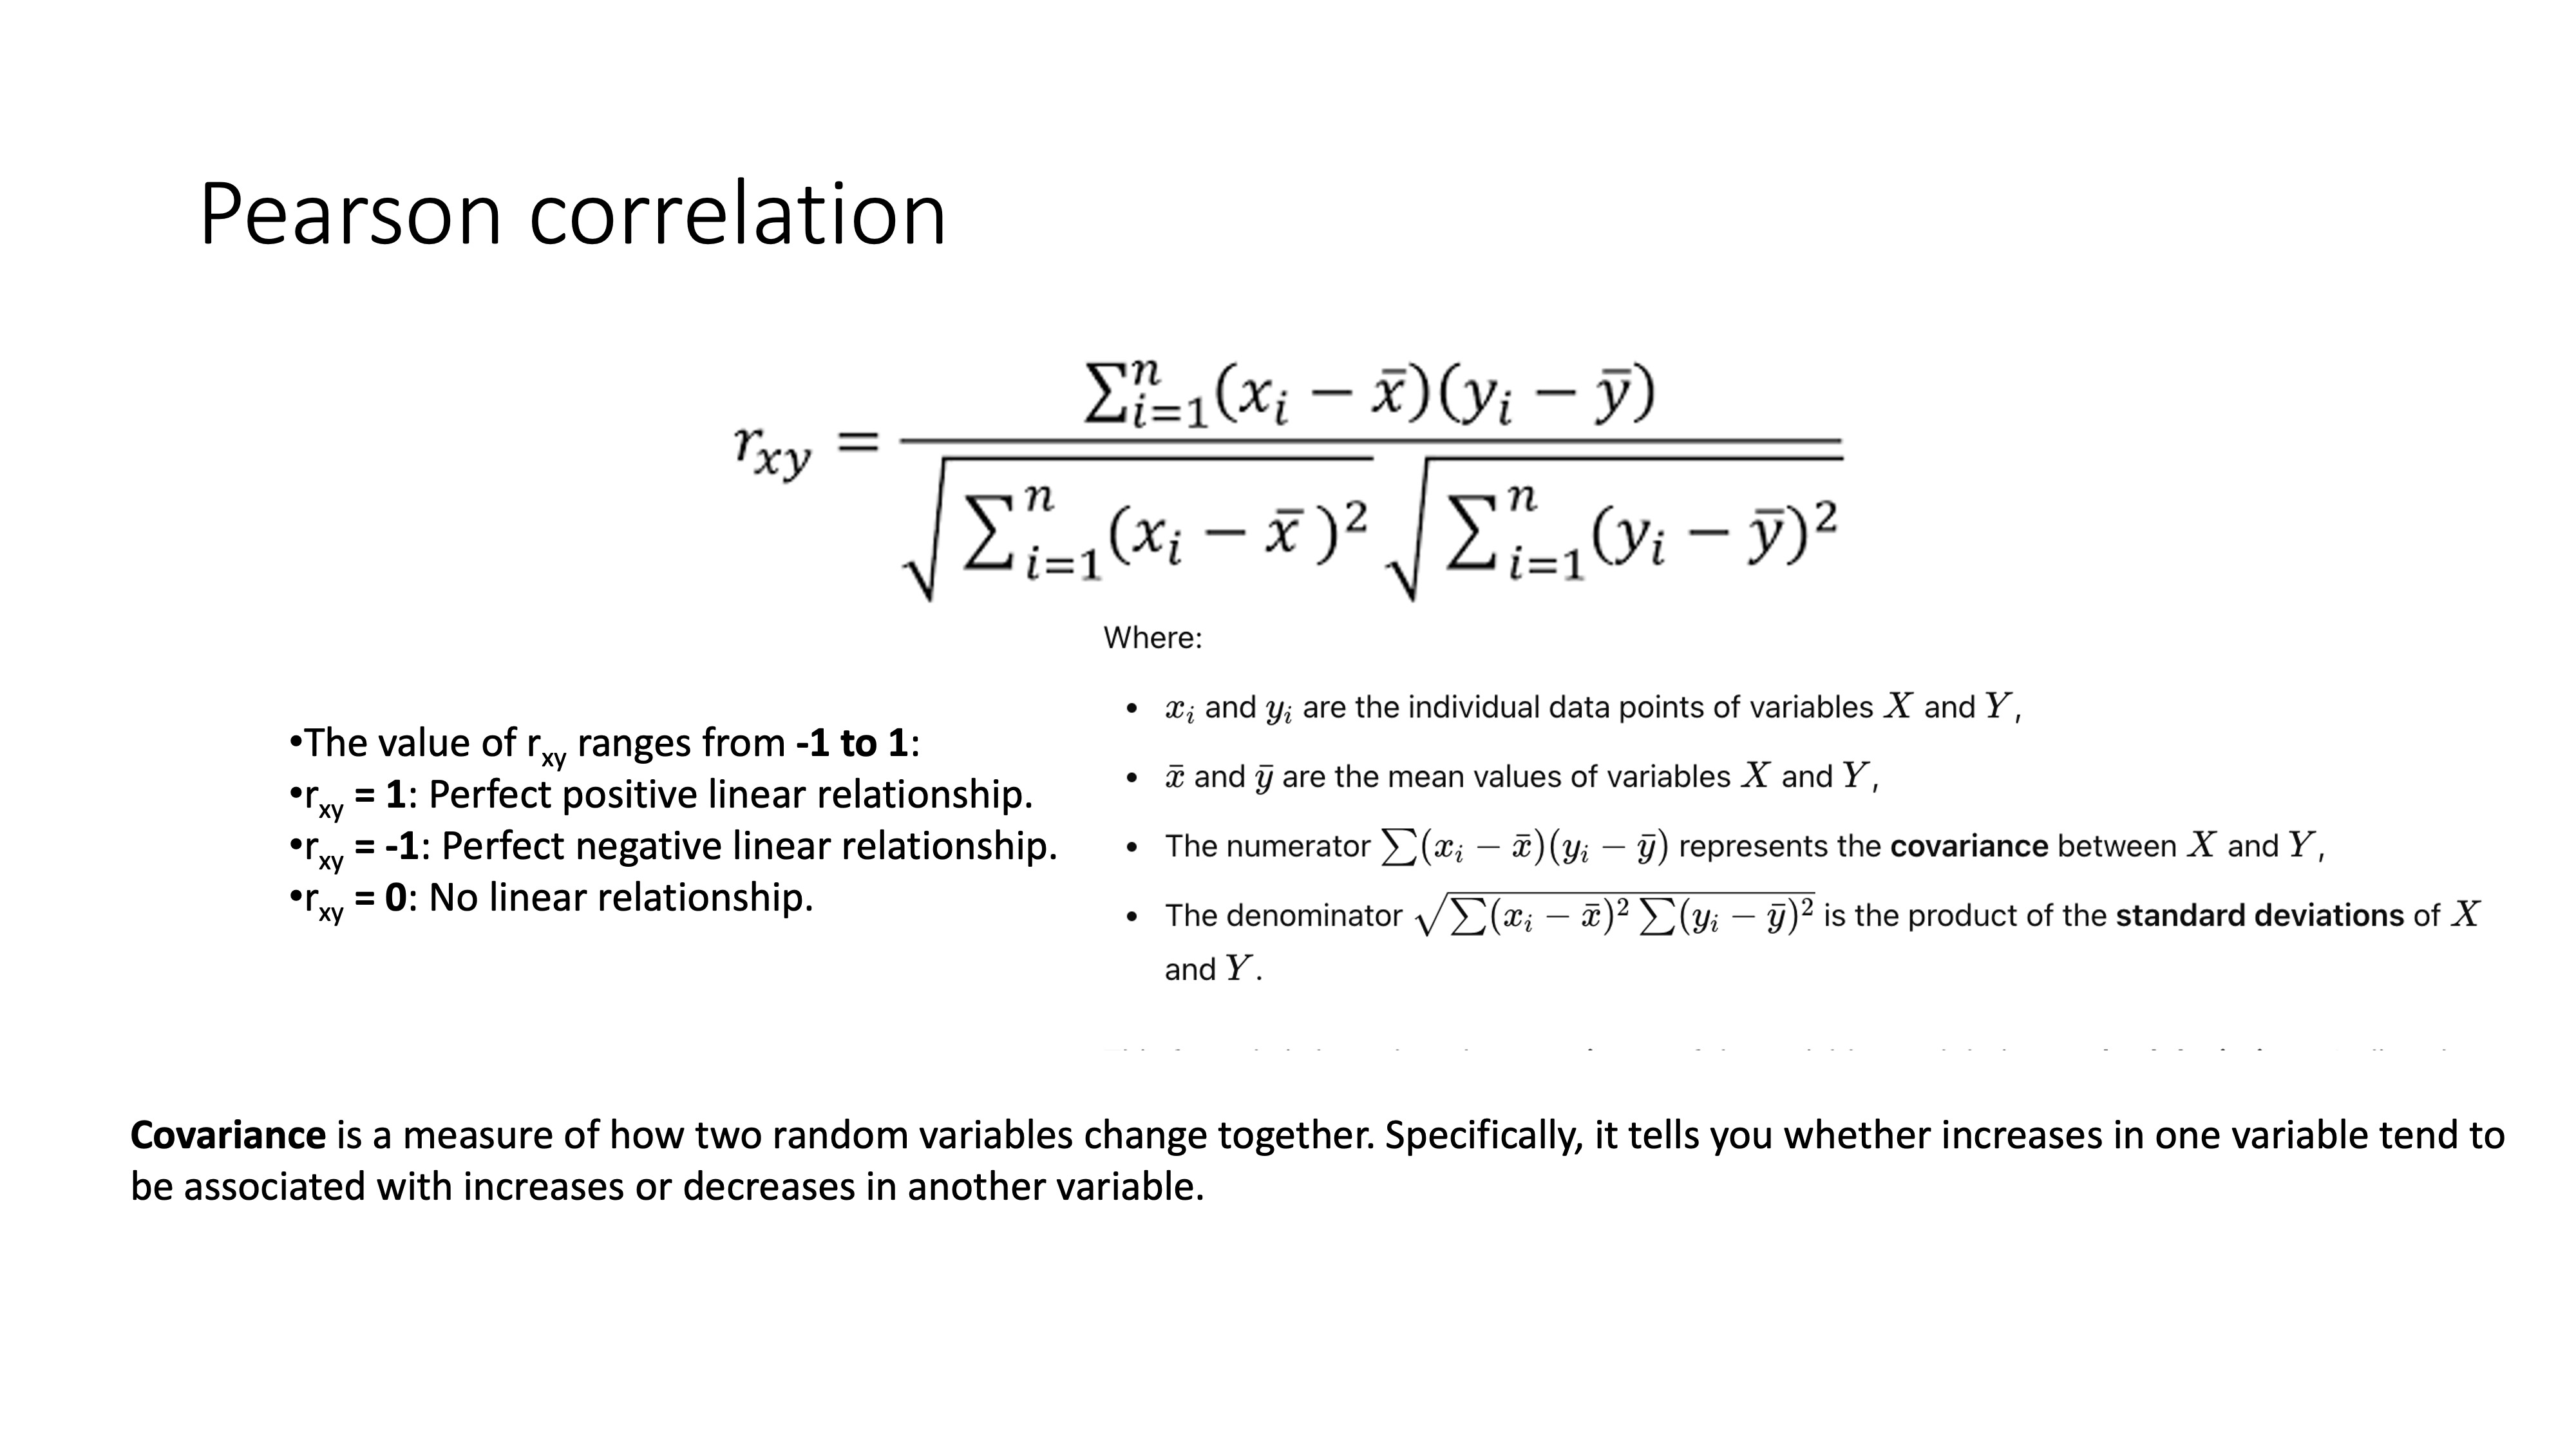

In [27]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
dataset = pd.read_csv(' https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete2.csv', index_col=0)

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

NameError: name 'df' is not defined

In [29]:
import pandas as pd
dataset=pd.read_csv(" https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete2.csv
")

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-29-ef4437b577dc>, line 2)

In [ ]:
# read the dataframe and visualize where the values are missing in many different ways

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataframe with missing values
d = pd.read_csv(' https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete2.csv')

# 1. Percentage of missing values per column
missing_percentage = d.isnull().sum() * 100 / len(d)
print("Percentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
P    58.0
Q    54.0
R    54.0
S    56.0
T    54.0
dtype: float64


In [ ]:
# read the dataframe and visualize where the values are missing in many different ways

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataframe with missing values
g = pd.read_csv(' https://raw.githubusercontent.com/CoderOnTheRoad/MLM-Machine-Learning-for-Materials-/refs/heads/master/day1/incomplete2.csv')

# 1. Percentage of missing values per column
missing_percentage = d.isnull().sum() * 100 / len(d)
print("Percentage of Missing Values per Column:")
print(missing_percentage)

Percentage of Missing Values per Column:
P    58.0
Q    54.0
R    54.0
S    56.0
T    54.0
dtype: float64


In [ ]:
# 2. Number of missing values per column
missing_counts = d.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_counts)

#What is the difference between #1 and #2?


Number of Missing Values per Column:
P    29
Q    27
R    27
S    28
T    27
dtype: int64


In [ ]:
# 3. Total number of missing values in the entire DataFrame
total_missing = d.isnull().sum().sum()
print("\nTotal Number of Missing Values:", total_missing)



Total Number of Missing Values: 138


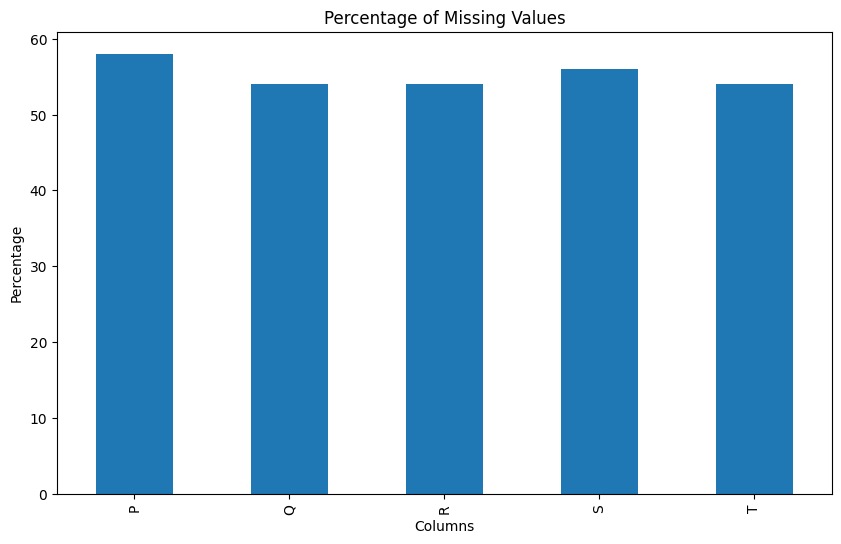

In [ ]:
# 4. Visualize missingness using a bar plot
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.show()

# Can you think about any other plot?

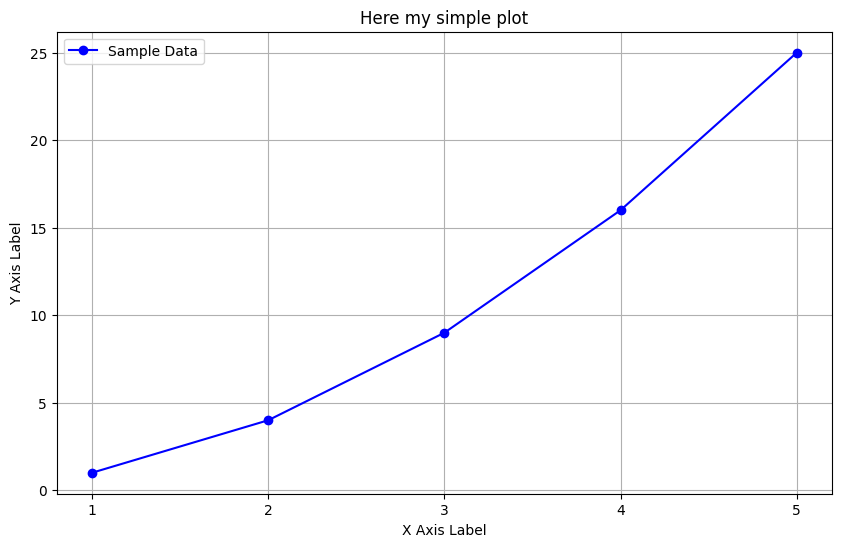

In [ ]:
#How to plot
import matplotlib.pyplot as plt

# Step 1: Prepare your data for example `x_data` and `y_data` in this case. They could be lists, numpy arrays, or pandas Series/DataFrames.

x_data = [1, 2, 3, 4, 5]
y_data = [1, 4, 9, 16, 25]

# Step 2: Create a figure, optional and You can adjust the size of the plot (width, height in inches)
plt.figure(figsize=(10, 6))

# Step 3: Plot the data
plt.plot(x_data, y_data, label="Sample Data", color='blue', marker='o')  # Line plot with customization

# Optional: In case you have another set
# plt.plot(x_data2, y_data2, label="Another Data", color='red')

# Step 4: Customize your plot. Title, axis labels, and legend
plt.title('Here my simple plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.legend()

# Optional: Customize tick marks and grid
plt.xticks([1, 2, 3, 4, 5])  # Set specific x-axis ticks
plt.yticks([0, 5, 10, 15, 20, 25])  # Set specific y-axis ticks
plt.grid(True)  # Show grid

# Step 5: Display the plot
plt.show()  # This will display the plot

# Step 6: Save the plot (optional)
# plt.savefig('my_plot.png')  # Save the plot to a file (e.g., PNG, PDF, etc.)
